In [96]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

from models.data import *

import os
import pandas as pd
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
fill_color = 'darkgray'

In [98]:

def plot_class_imbalance(y, title="Class Imbalance", ax=None, figsize=(4, 3)):
    classes, counts = np.unique(y, return_counts=True)
    print(classes, counts)

    if not ax:
        fig, ax = plt.subplots(figsize=figsize)
    bars = ax.bar(classes, counts, color=fill_color)
    ax.set_title(title)
    ax.set_xlabel('Classes')
    ax.set_ylabel('Frequency')
    ax.set_xticks(classes)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # for bar, count in zip(bars, counts):
    #     ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')
    
    if not ax:
        plt.show()


In [99]:

def plot_ts_lengths(X, title="Time Series Lengths", ax=None, figsize=(4, 3)):
    min_ts_size = min([x.shape[1] for x in X])
    max_ts_size = max([x.shape[1] for x in X])
    ts_lengths = [x.shape[1] for x in X]

    if not ax:
        fig, ax = plt.subplots(figsize=figsize)
    
    ax.hist(ts_lengths, bins=int((max_ts_size + 1 - min_ts_size)/5), color=fill_color, edgecolor='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Time Series Lengths')
    ax.set_ylabel('Frequency')
    # ax.set_xticks(range(min_ts_size, max_ts_size + 1))
    # ax.locator_params(axis='x', nbins=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    if not ax:
        plt.show()


In [100]:
datasets = {}

[0 1] [25132  4005]


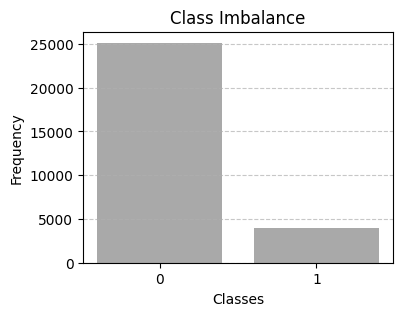

In [101]:
X_time, X_ind, X_static, y, MIMIC_changing_vars, static_names = load_MIMIC_data()
plot_class_imbalance(y[:, 1])

datasets["MIMIC"] = y[:, 1]

[1 2 3 4 5 6 7 8 9] [20000  3883 20000 19398 15530  6817  9187  1754  3118]


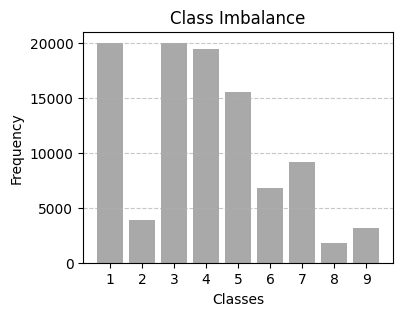

In [102]:
X, y = load_classification("Tiselac", extract_path="/workdir/data")
y = y.astype(int)
plot_class_imbalance(y)

datasets["Tiselac"] = y

[ 1  2  3  4  5  6  7  8  9 10] [880 880 880 880 880 880 880 880 880 878]


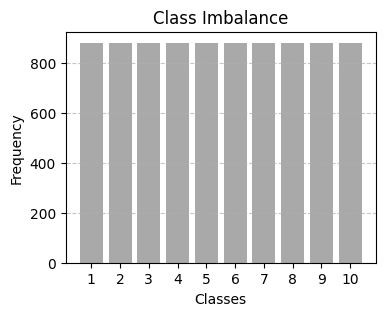

In [103]:
X, y = load_classification("SpokenArabicDigits", extract_path="/workdir/data")
y = y.astype(int)
plot_class_imbalance(y)

# datasets["SpokenArabicDigits"] = y

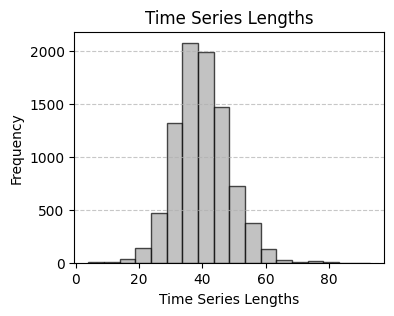

In [113]:
X, y = load_classification("SpokenArabicDigits", extract_path="/workdir/data")
y = y.astype(int)
plot_ts_lengths(X)

datasets["SpokenArabicDigits"] = X

In [117]:
for i, x in enumerate(X):
    print(x.shape)
    if i > 10:
        break

(13, 38)
(13, 39)
(13, 45)
(13, 39)
(13, 38)
(13, 36)
(13, 44)
(13, 32)
(13, 37)
(13, 38)
(13, 28)
(13, 32)


[0 1] [25132  4005]
[1 2 3 4 5 6 7 8 9] [20000  3883 20000 19398 15530  6817  9187  1754  3118]


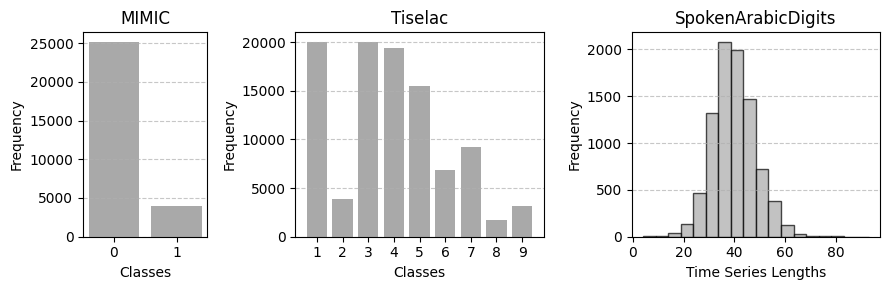

In [112]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), gridspec_kw={'width_ratios': [1, 2, 2]})

# for (name, y), ax in zip(datasets.items(), axs):
plot_class_imbalance(datasets["MIMIC"], "MIMIC", axs[0])
plot_class_imbalance(datasets["Tiselac"], "TiSeLaC", axs[1])
plot_ts_lengths(datasets["SpokenArabicDigits"], "SpokenArabicDigits", axs[2])

plt.tight_layout()
plt.savefig("Datasets.pdf", format='pdf')
plt.show()